In [1]:
import warnings
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

# show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [10]:
import matplotlib.pyplot as plt

def plot_bar(dataframe, x, y, title, xlabel, ylabel, color):
    dataframe.plot(kind = "bar", 
                   x = x,
                   y = y,
                   color = color,
                   figsize = (20,10), 
                   title = title,
                   legend = False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

#### Load listings data set and hold specific columns

In [7]:
from IPython.display import display

# columns that we need
columns = [ "listing_id", "date", "price" ]

# load the data set
calendar = pd.read_csv("../data_sets/calendar.csv", usecols = columns)

# display the data set
display(calendar.shape, calendar.head(5))

(4159030, 3)

,listing_id,date,price
0,138386,2020-05-18,$55.00
1,10595,2020-05-18,$60.00
2,10595,2020-05-19,$60.00
3,10595,2020-05-20,$60.00
4,10595,2020-05-21,$60.00


#### Drop all rows that have any nan value

In [8]:
# drop rows
calendar = calendar.dropna()

# display the data set
display(calendar.shape, calendar.head(5))

(4150800, 3)

,listing_id,date,price
0,138386,2020-05-18,$55.00
1,10595,2020-05-18,$60.00
2,10595,2020-05-19,$60.00
3,10595,2020-05-20,$60.00
4,10595,2020-05-21,$60.00


#### Clean data

In [9]:
# extract prices from the table
price = calendar["price"]
prices=[]
# clean the price and convert it to float
for p in price:
    get_price = p[1:]                     # remove '$'
    get_price = get_price.replace(",","") # remove ','
    prices.append(float(get_price))       # string to float
# replace the price column with the new float prices column
calendar["price"] = prices

# separate the date column to year, month, day
calendar["year"], calendar["month"], calendar["day"] = calendar["date"].str.split("-",2).str

# display the data set
display(calendar.shape, calendar.head(5))

(4150800, 6)

,listing_id,date,price,year,month,day
0,138386,2020-05-18,55.0,2020,05,18
1,10595,2020-05-18,60.0,2020,05,18
2,10595,2020-05-19,60.0,2020,05,19
3,10595,2020-05-20,60.0,2020,05,20
4,10595,2020-05-21,60.0,2020,05,21


#### Average Monthly Price per Year

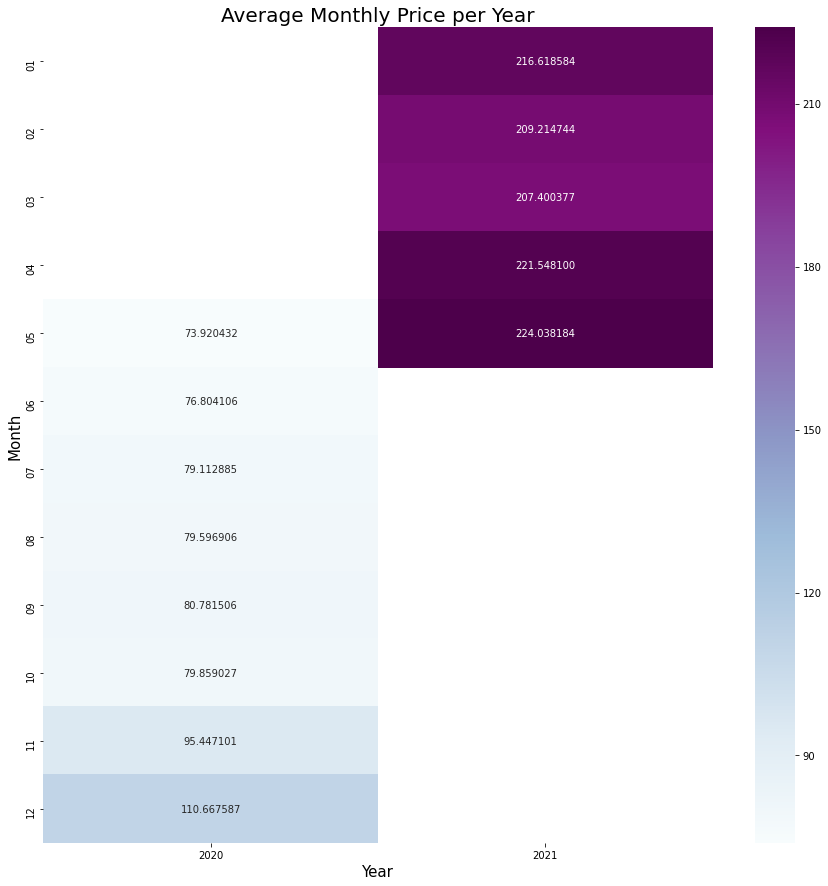

In [35]:
# group by month and year and calculate mean price
month_per_year = calendar.groupby(["year", "month"]).price.mean()
month_per_year = month_per_year.reset_index()
#display(month_per_year)

import seaborn as sns

# plot heat map
plt.figure(figsize=(15,15))
sns.heatmap(calendar.groupby(["month", "year"]).price.mean().unstack(),annot=True, fmt="f", cmap="BuPu")
plt.title("Average Monthly Price per Year", fontsize = 20)
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Month",fontsize = 15)
plt.show()